# Project Name: Healthcare PGP

In [2]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  

%matplotlib inline

In [1]:
df=pd.read_csv(r'C:\Users\Anuj Bhalla\Downloads\Project_2\Project 2\Healthcare - Diabetes\health care diabetes.csv')

<IPython.core.display.Javascript object>

## Project Task: Week 3

In [35]:
'''
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. 
Express your thought process.

2. Apply an appropriate classification algorithm to build a model. 
Compare various models with the results from KNN algorithm
'''

'\nData Modeling:\n\n1. Devise strategies for model building. It is important to decide the right validation framework. \nExpress your thought process.\n\n2. Apply an appropriate classification algorithm to build a model. \nCompare various models with the results from KNN algorithm\n'

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [37]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [40]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Anuj Bhalla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.758957654723127
0.8311688311688312


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,model.predict(x))
cm

array([[437,  63],
       [111, 157]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       500
           1       0.71      0.59      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



## KNN Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train,y_train)
knn_pred=knn_model.predict(x_test)

Model Validation ==>

Accuracy Score of KNN Model::
0.7792207792207793

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154
 


 ROC Curve


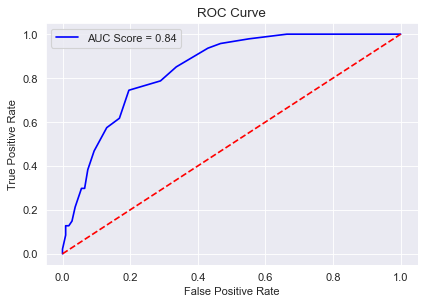

In [45]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(x_test)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [46]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(x_train,y_train)
model3_pred=model3.predict(x_test)

Model Validation ==>

Accuracy Score of Decision Tree Model::
0.7662337662337663

 Classification Report::
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       107
           1       0.59      0.74      0.66        47

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.77       154
 


 ROC Curve


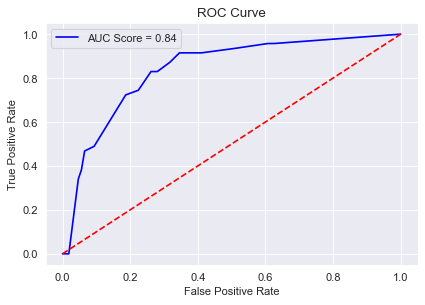

In [47]:
print("Model Validation ==>\n")
print("Accuracy Score of Decision Tree Model::")
print(metrics.accuracy_score(y_test,model3_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,model3_pred),'\n')
print("\n","ROC Curve")
model3x=model3.predict_proba(x_test)
model3x1=model3x[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,model3x1)
roc_auc_model3=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_model3)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

LR: 0.768182 (0.052814)
LDA: 0.770848 (0.049695)
KNN: 0.717379 (0.062974)
CART: 0.705690 (0.052963)
NB: 0.744771 (0.043265)
SVM: 0.759176 (0.054923)
RFC: 0.753862 (0.064546)


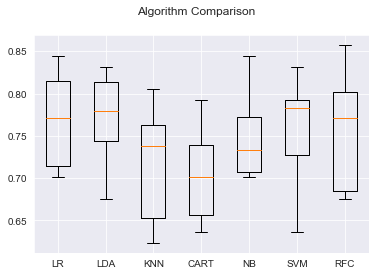

In [55]:
# Compare Models

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# prepare configuration for cross validation test harness
seed = 100
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## From the above comparison, we concluded that SVM model has the best accuracy on this dataset.

### Project Task: Week 4

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [63]:

model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.735563 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
0.669399 (0.061948) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.669399 (0.061948) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.683483 (0.051721) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.690014 (0.051898) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.700864 (0.043099) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.700308 (0.041740) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.723101 (0.038910) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.725806 (0.039912) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.721488 (0.034210) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.716579 (0.036291) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.723145 

In [70]:
'''
Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.
'''

'\nData Reporting:\n\n2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:\n\na. Pie chart to describe the diabetic or non-diabetic population\n\nb. Scatter charts between relevant variables to analyze the relationships\n\nc. Histogram or frequency charts to analyze the distribution of the data\n\nd. Heatmap of correlation analysis among the relevant variables\n\ne. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.\n'

## I have created Tableau Dashboard here for Week 4 Data Reporting Tasks:

## https://public.tableau.com/app/profile/anuj.bhalla/viz/PGP-HealthCare-CapStone-Project-AnujBhalla/Dashboard1